# Classification

In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('data.csv')
# Exclude empty column 
df = df.drop('Unnamed: 6', axis = 1)
df

,Purchase,SUS,Duration,Gender,ASR_Error,Intent_Error
0,1,84,254,0,3,2
1,0,58,247,0,6,9
2,0,56,125,1,6,8
3,0,55,22,0,11,7
4,1,95,262,0,2,3
...,...,...,...,...,...,...
95,0,57,358,0,13,7
96,1,93,71,0,3,0
97,0,80,34,1,0,9
98,1,82,49,1,4,1


In [64]:
df.isna().sum()
# No empty fields

Purchase        0
SUS             0
Duration        0
Gender          0
ASR_Error       0
Intent_Error    0
dtype: int64

In [65]:
# label/Classes (Purchase- 0/1)
# Load classes as an array
y = df["Purchase"].to_numpy()
y

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [66]:
# data (ASR_Error, IntentError, Duration, and Gender)
# Load data as an array
x = df.drop(["Purchase", "SUS"], axis = 1).to_numpy()
x

array([[254,   0,   3,   2],
       [247,   0,   6,   9],
       [125,   1,   6,   8],
       [ 22,   0,  11,   7],
       [262,   0,   2,   3],
       [113,   1,   8,   9],
       [ 91,   1,   6,   3],
       [ 46,   0,   6,  11],
       [132,   0,   9,   9],
       [190,   0,  11,   4],
       [146,   0,   9,   7],
       [226,   0,   4,   4],
       [ 54,   1,   7,   9],
       [104,   0,   2,   3],
       [292,   0,   7,   3],
       [126,   0,   8,   9],
       [152,   1,   3,   5],
       [221,   0,   3,   4],
       [ 51,   0,   9,   9],
       [230,   0,   6,   8],
       [ 72,   1,   6,   8],
       [284,   0,   6,  11],
       [168,   0,   2,   4],
       [194,   0,   1,   3],
       [130,   1,  10,   1],
       [227,   0,   9,   3],
       [161,   1,   7,   8],
       [262,   1,   2,   3],
       [257,   1,   9,  11],
       [ 57,   1,   8,   3],
       [138,   0,   8,   9],
       [ 33,   1,   9,   4],
       [260,   0,   1,   2],
       [178,   1,   3,   4],
       [153,  

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

scale = StandardScaler()
scaled_X = scale.fit_transform(x)

# 70 % training, 30% testing  
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3)

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report
# plt for plots and metrics for confusion matricies and roc curves


# 1. Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

lc = LogisticRegression()
lc.fit(X_train, y_train)

# Actual Predictions from Logistic Regression
y_lc_predicted = lc.predict(X_test)
# Probablilty of Assurance
y_lc_pred_proba = lc.predict_proba(X_test)

print(y_lc_predicted)
print(y_lc_pred_proba)

[1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1]
[[0.41810932 0.58189068]
 [0.9948629  0.0051371 ]
 [0.93165034 0.06834966]
 [0.01995445 0.98004555]
 [0.07720659 0.92279341]
 [0.97337843 0.02662157]
 [0.04394828 0.95605172]
 [0.04983002 0.95016998]
 [0.56971526 0.43028474]
 [0.98710709 0.01289291]
 [0.98753786 0.01246214]
 [0.31715595 0.68284405]
 [0.57928914 0.42071086]
 [0.25965848 0.74034152]
 [0.98681383 0.01318617]
 [0.22709966 0.77290034]
 [0.8853509  0.1146491 ]
 [0.06497664 0.93502336]
 [0.93648557 0.06351443]
 [0.18134761 0.81865239]
 [0.03977446 0.96022554]
 [0.11235969 0.88764031]
 [0.9254423  0.0745577 ]
 [0.94775003 0.05224997]
 [0.03230092 0.96769908]
 [0.79743291 0.20256709]
 [0.88718732 0.11281268]
 [0.06694064 0.93305936]
 [0.16846832 0.83153168]
 [0.02351687 0.97648313]]


In [70]:
# Precision, Recall, F-1 Score, Accuracy for Logistic Regression
print(classification_report(y_test, y_lc_predicted))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

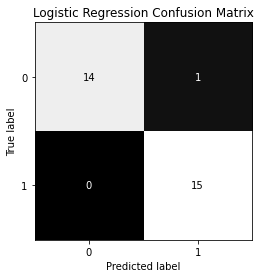

In [71]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), y_lc_predicted))  # Predicted compared to actual/test
disp.plot(
    include_values=True,
    cmap='gray',
    colorbar=False
)
disp.ax_.set_title("Logistic Regression Confusion Matrix")

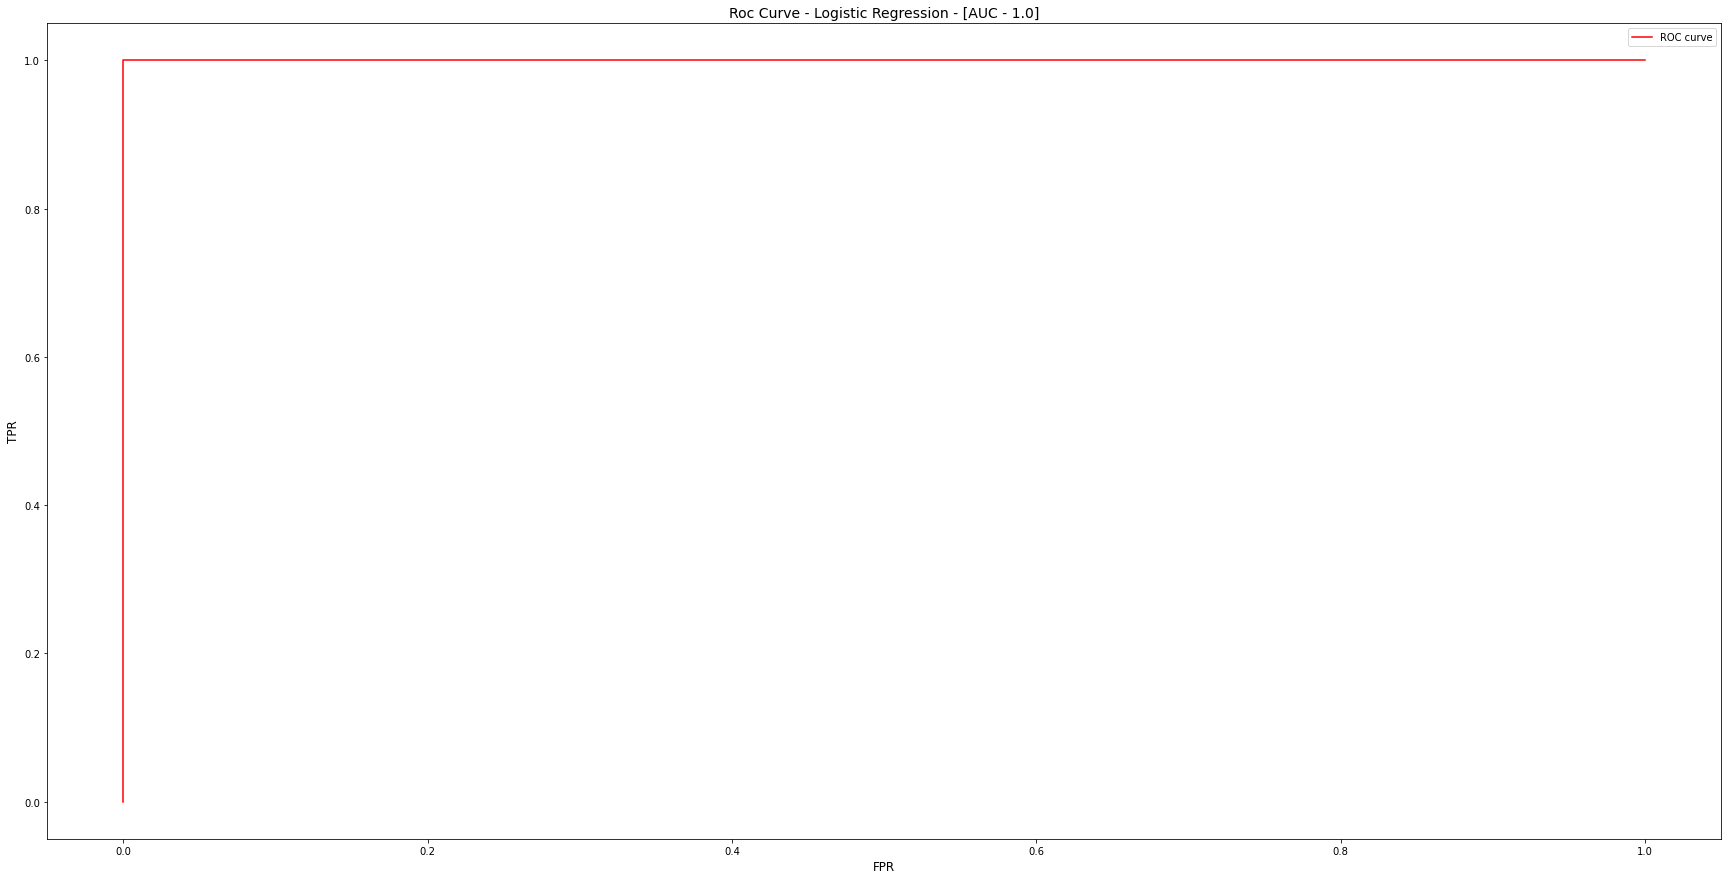

In [72]:
# ROC Curve Plot
plt.figure(figsize=(30, 15))
fpr, tpr, thresholds = roc_curve(y_test, y_lc_pred_proba[:, 1]) #false-positive rate and true-positive rate 
auc_score = auc(fpr, tpr) # Area under the curve
plt.plot(fpr, tpr, 'r', label='ROC curve')
plt.title(f'Roc Curve - Logistic Regression - [AUC - {auc_score}]', fontsize=14)
plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPR', fontsize=12)
plt.legend()
plt.show()

# 2. Support Vector Machine

In [73]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train, y_train)

# Actual Predictions from SVC
y_svc_predicted = svc.predict(X_test)
# Probablilty of Assurance
y_svc_pred_proba = svc.predict_proba(X_test)

print(y_svc_predicted)
print(y_svc_pred_proba)

[1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1]
[[0.42503369 0.57496631]
 [0.94330023 0.05669977]
 [0.95955253 0.04044747]
 [0.04697203 0.95302797]
 [0.04678394 0.95321606]
 [0.95520892 0.04479108]
 [0.01889074 0.98110926]
 [0.02857579 0.97142421]
 [0.80240677 0.19759323]
 [0.96461734 0.03538266]
 [0.96978055 0.03021945]
 [0.13222798 0.86777202]
 [0.81235015 0.18764985]
 [0.08467211 0.91532789]
 [0.95064956 0.04935044]
 [0.06829657 0.93170343]
 [0.95010229 0.04989771]
 [0.02918614 0.97081386]
 [0.95252781 0.04747219]
 [0.17873595 0.82126405]
 [0.019082   0.980918  ]
 [0.03911108 0.96088892]
 [0.90832317 0.09167683]
 [0.95808281 0.04191719]
 [0.03380989 0.96619011]
 [0.8860207  0.1139793 ]
 [0.93424691 0.06575309]
 [0.02845039 0.97154961]
 [0.37406881 0.62593119]
 [0.02343703 0.97656297]]


In [74]:
# Precision, Recall, F-1 Score, Accuracy for SVC
print(classification_report(y_test, y_svc_predicted))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Text(0.5, 1.0, 'Support Vector Confusion Matrix')

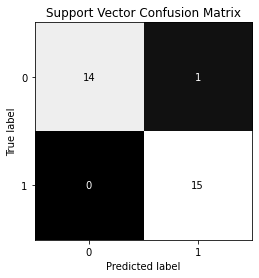

In [75]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), y_svc_predicted))  # Predicted compared to actual/test
disp.plot(
    include_values=True,
    cmap='gray',
    colorbar=False
)
disp.ax_.set_title("Support Vector Confusion Matrix")

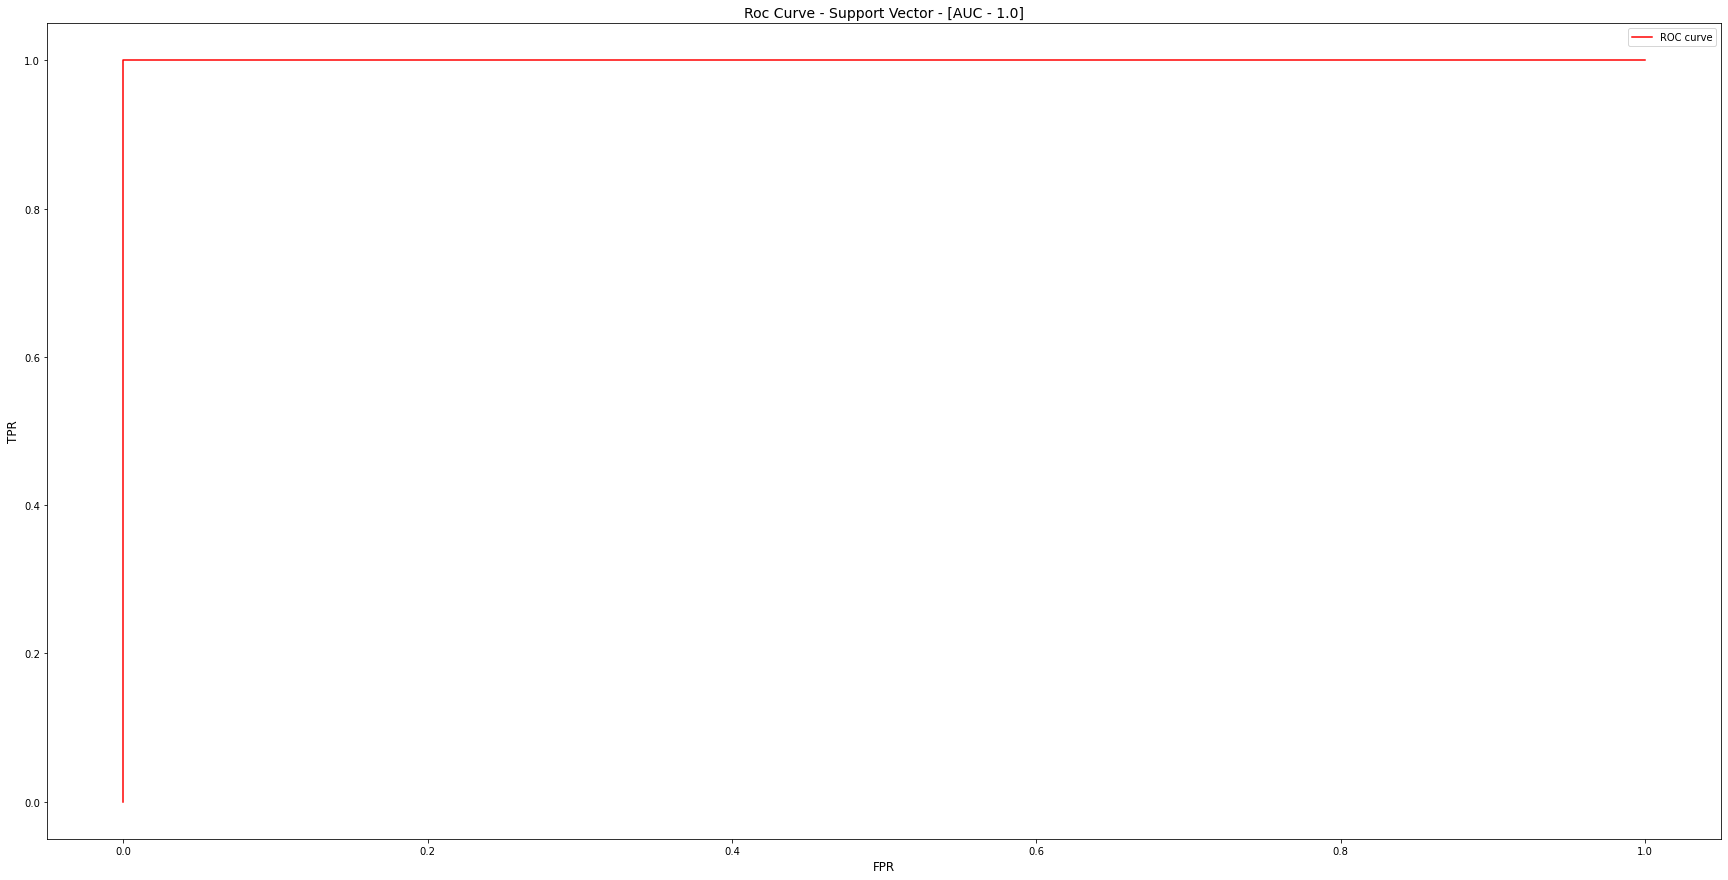

In [76]:
# ROC Curve Plot
plt.figure(figsize=(30, 15))
fpr, tpr, thresholds = roc_curve(y_test, y_svc_pred_proba[:, 1]) #false-positive rate and true-positive rate 
auc_score = auc(fpr, tpr) # Area under the curve
plt.plot(fpr, tpr, 'r', label='ROC curve')
plt.title(f'Roc Curve - Support Vector - [AUC - {auc_score}]', fontsize=14)
plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPR', fontsize=12)
plt.legend()
plt.show()

# 3. Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train, y_train)

# Actual Predictions from SVC
y_nbc_predicted = nbc.predict(X_test)
# Probablilty of Assurance
y_nbc_pred_proba = nbc.predict_proba(X_test)

print(y_nbc_predicted)
print(y_nbc_pred_proba)

[0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1]
[[5.60882488e-01 4.39117512e-01]
 [9.99997995e-01 2.00543703e-06]
 [9.94614544e-01 5.38545595e-03]
 [1.42313129e-03 9.98576869e-01]
 [1.66604652e-03 9.98333953e-01]
 [9.99972576e-01 2.74236630e-05]
 [3.67138556e-03 9.96328614e-01]
 [4.20322759e-03 9.95796772e-01]
 [5.11906308e-01 4.88093692e-01]
 [9.99996510e-01 3.49024858e-06]
 [9.99981389e-01 1.86112087e-05]
 [4.99863948e-02 9.50013605e-01]
 [6.92566943e-01 3.07433057e-01]
 [2.28884117e-02 9.77111588e-01]
 [9.99983347e-01 1.66526992e-05]
 [1.79845104e-02 9.82015490e-01]
 [9.97485857e-01 2.51414298e-03]
 [8.68384929e-03 9.91316151e-01]
 [9.99730813e-01 2.69186739e-04]
 [1.33727682e-01 8.66272318e-01]
 [3.45559827e-03 9.96544402e-01]
 [2.40263712e-02 9.75973629e-01]
 [9.99956280e-01 4.37198803e-05]
 [9.99018071e-01 9.81929452e-04]
 [5.66568548e-03 9.94334315e-01]
 [9.89339080e-01 1.06609199e-02]
 [9.99199379e-01 8.00621301e-04]
 [8.81181728e-03 9.91188183e-01]
 [2.16938188e-

In [78]:
# Precision, Recall, F-1 Score, Accuracy for NBC
print(classification_report(y_test, y_nbc_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Naive Bayes Confusion Matrix')

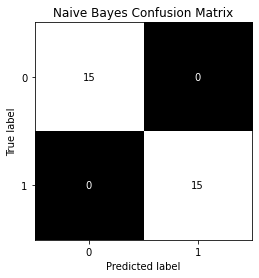

In [79]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), y_nbc_predicted))  # Predicted compared to actual/test
disp.plot(
    include_values=True,
    cmap='gray',
    colorbar=False
)
disp.ax_.set_title("Naive Bayes Confusion Matrix")

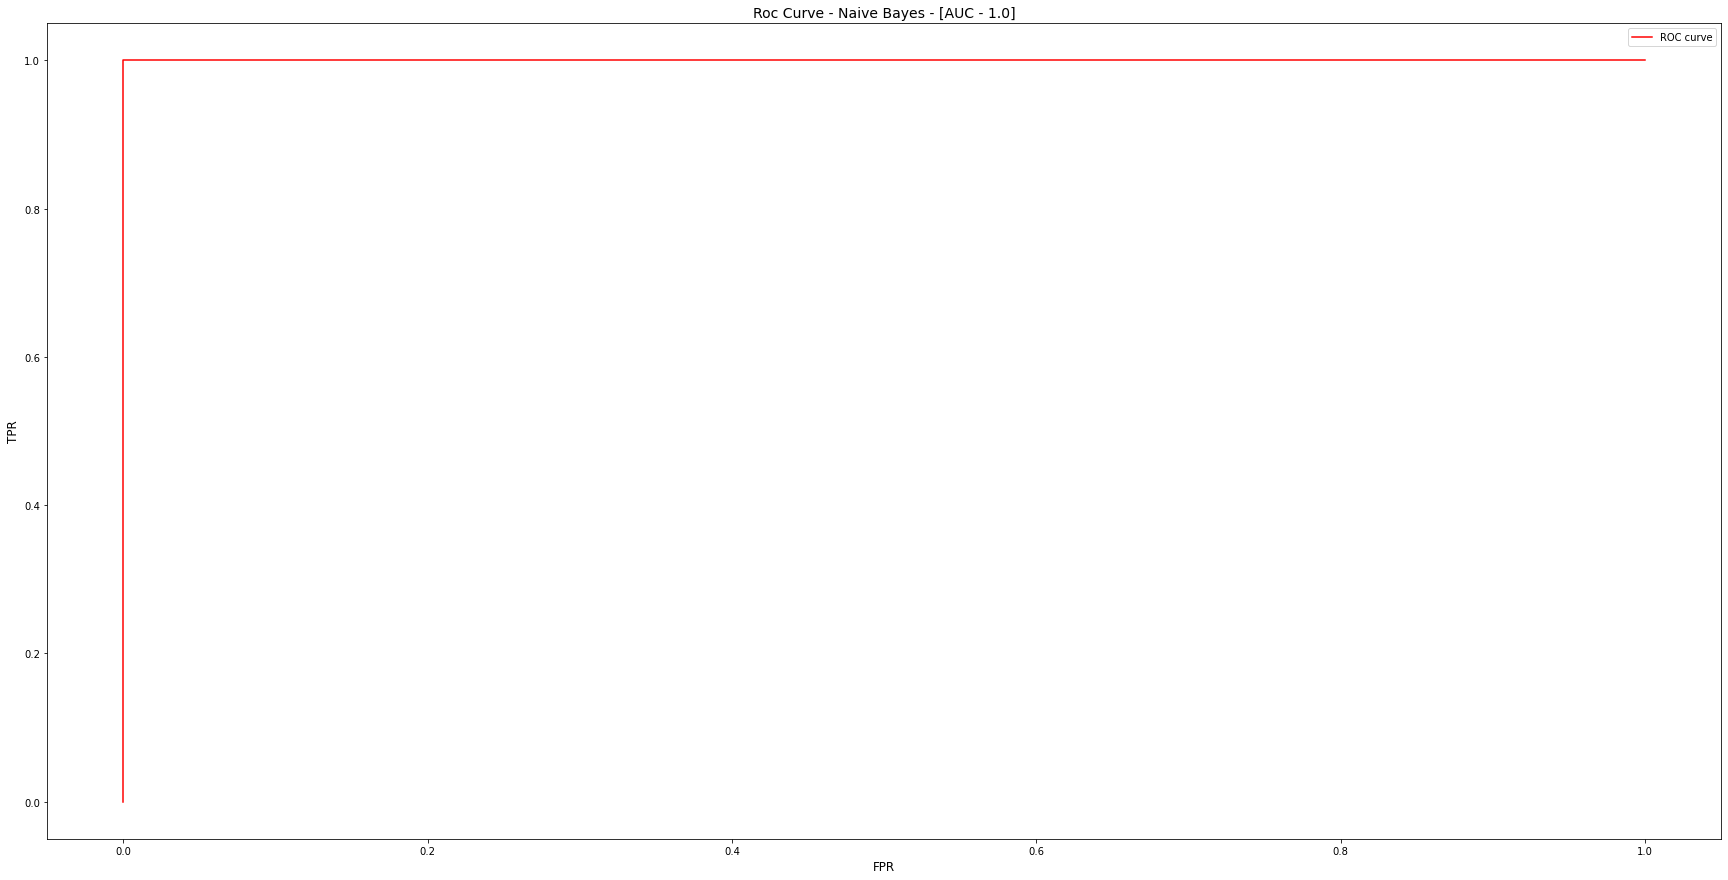

In [80]:
# ROC Curve Plot
plt.figure(figsize=(30, 15))
fpr, tpr, thresholds = roc_curve(y_test, y_nbc_pred_proba[:, 1]) #false-positive rate and true-positive rate 
auc_score = auc(fpr, tpr) # Area under the curve
plt.plot(fpr, tpr, 'r', label='ROC curve')
plt.title(f'Roc Curve - Naive Bayes - [AUC - {auc_score}]', fontsize=14)
plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPR', fontsize=12)
plt.legend()
plt.show()

# 4. Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Actual Predictions from Random Forest
y_rfc_predicted = rfc.predict(X_test)
# Probablilty of Assurance
y_rfc_pred_proba = rfc.predict_proba(X_test)

print(y_rfc_predicted)
print(y_rfc_pred_proba)

[1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1]
[[0.48 0.52]
 [0.97 0.03]
 [1.   0.  ]
 [0.02 0.98]
 [0.   1.  ]
 [0.95 0.05]
 [0.   1.  ]
 [0.01 0.99]
 [0.59 0.41]
 [0.95 0.05]
 [0.96 0.04]
 [0.07 0.93]
 [0.64 0.36]
 [0.06 0.94]
 [1.   0.  ]
 [0.01 0.99]
 [0.99 0.01]
 [0.02 0.98]
 [0.91 0.09]
 [0.21 0.79]
 [0.   1.  ]
 [0.01 0.99]
 [0.82 0.18]
 [0.97 0.03]
 [0.1  0.9 ]
 [1.   0.  ]
 [0.98 0.02]
 [0.02 0.98]
 [0.49 0.51]
 [0.   1.  ]]


In [82]:
# Precision, Recall, F-1 Score, Accuracy for Random Forest
print(classification_report(y_test, y_rfc_predicted))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

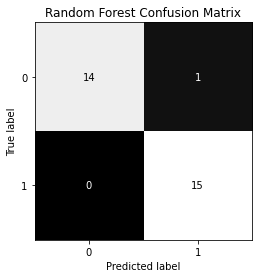

In [83]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), y_rfc_predicted))  # Predicted compared to actual/test
disp.plot(
    include_values=True,
    cmap='gray',
    colorbar=False
)
disp.ax_.set_title("Random Forest Confusion Matrix")

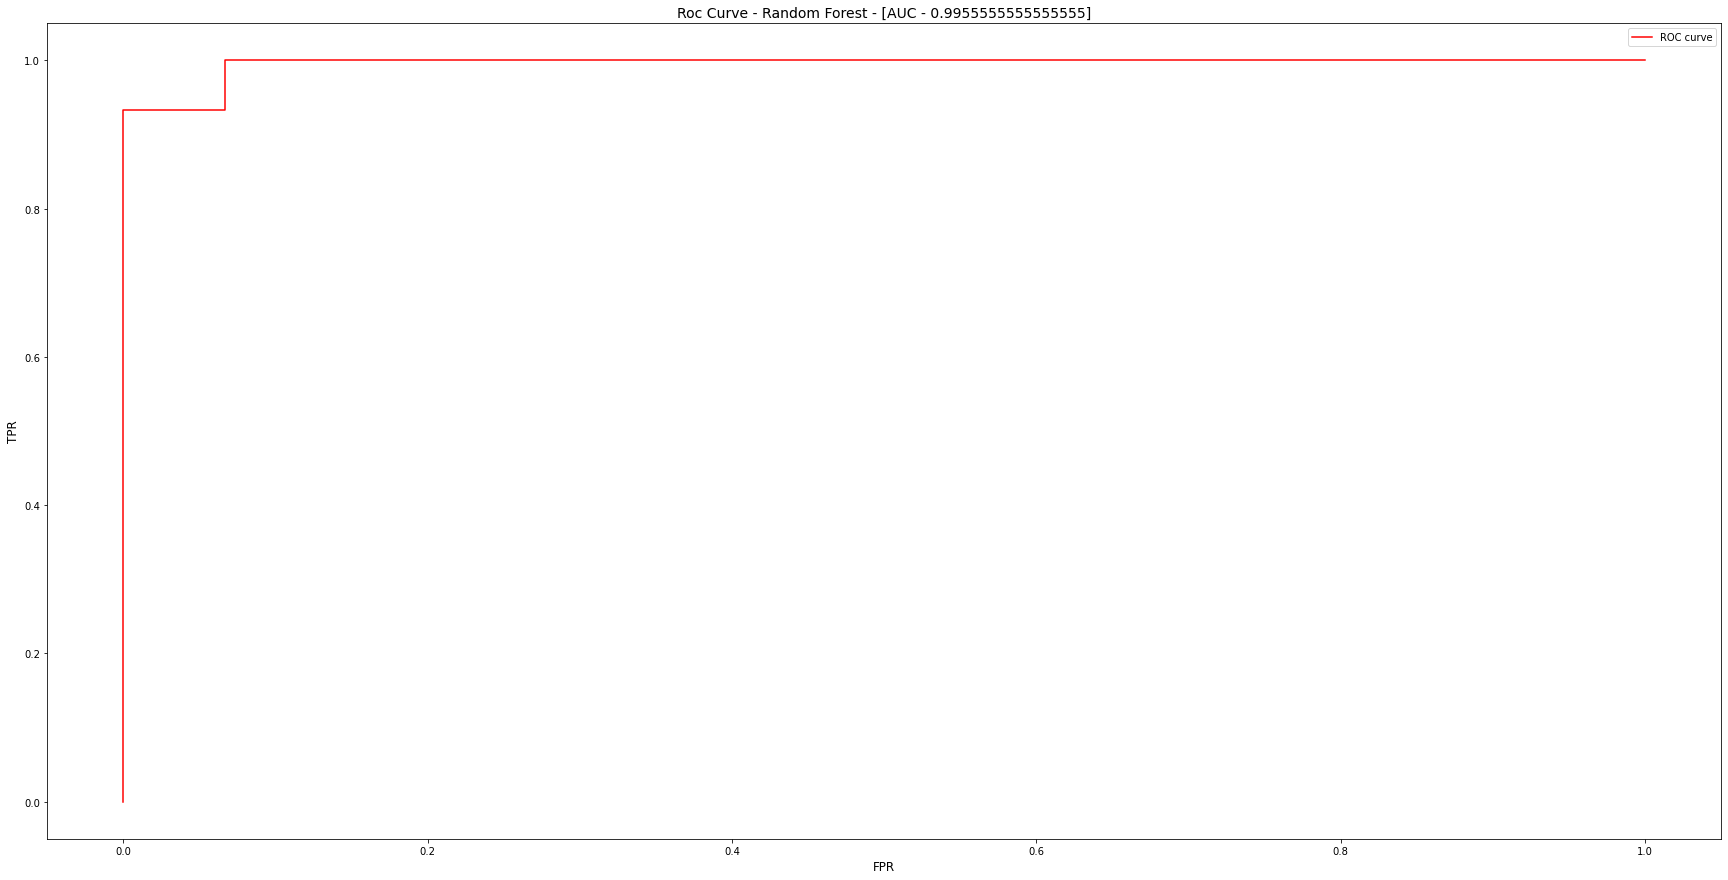

In [84]:
# ROC Curve Plot
plt.figure(figsize=(30, 15))
fpr, tpr, thresholds = roc_curve(y_test, y_rfc_pred_proba[:, 1]) #false-positive rate and true-positive rate 
auc_score = auc(fpr, tpr) # Area under the curve
plt.plot(fpr, tpr, 'r', label='ROC curve')
plt.title(f'Roc Curve - Random Forest - [AUC - {auc_score}]', fontsize=14)
plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPR', fontsize=12)
plt.legend()
plt.show()